In [30]:
import pandas as pd
import numpy as np
import os

In [31]:
%run sqlite_execution.py
db1 = DB_V1()
# db1.drop_duplicates()
# db1.drop_unuseable_images(commit=True)
# db1.cur.execute("UPDATE captchas_v1 SET captcha_string = 'headphones' WHERE captcha_string = 'Please click each image containing headphones'")
# db1.cur.execute("UPDATE captchas_v1 SET file_path = REPLACE(file_path, 'Please click each image containing headphones', 'headphones')")
# db1.commit()
info = db1.get_info()
info

,total,solved,unsolved
bonsai tree,1235,984,251
laptop,2005,591,1414
tree,2008,527,1481
headphones,2003,515,1488
flower,1670,500,1170
cup of orange juice,703,415,288
car,1493,359,1134
motorcycle,1335,309,1026
violin,249,249,0
helicopter,242,242,0


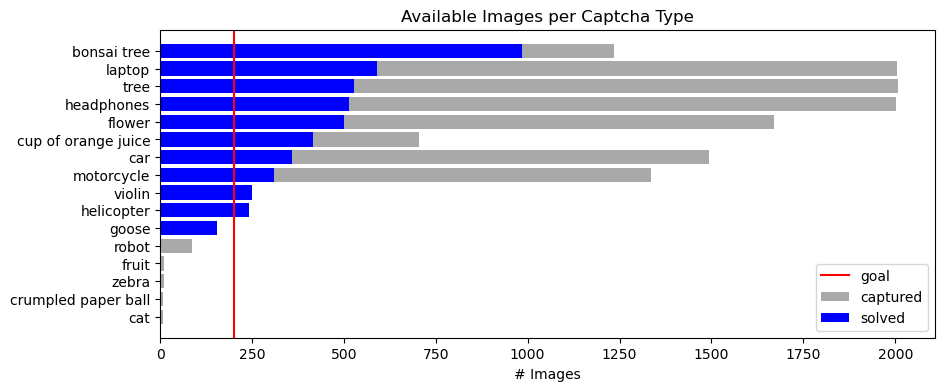

In [32]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [33]:
%run pytorch_training.py
# train_model_on_captcha_string(db1, "laptop", save=True, epochs=10)
train_models_on_all_captcha_strings(db1, threshold=200, save=True)

Training model on bonsai tree with 984 samples...
Training model on bonsai tree...
Fount 984 useable images
x shape: (984, 3, 128, 128)
y shape: (984, 1)
train size: 736, test size: 248
single element shape: torch.Size([3, 128, 128])
Epoch: 1, Test Loss: 0.0021, Accuracy: 191/248, 77.02%
Epoch: 2, Test Loss: 0.0017, Accuracy: 229/248, 92.34%
Epoch: 3, Test Loss: 0.0009, Accuracy: 228/248, 91.94%
Epoch: 4, Test Loss: 0.0008, Accuracy: 229/248, 92.34%
Epoch: 5, Test Loss: 0.0006, Accuracy: 237/248, 95.56%
Epoch: 6, Test Loss: 0.0005, Accuracy: 237/248, 95.56%
Epoch: 7, Test Loss: 0.0004, Accuracy: 234/248, 94.35%
Epoch: 8, Test Loss: 0.0004, Accuracy: 234/248, 94.35%
Epoch: 9, Test Loss: 0.0004, Accuracy: 238/248, 95.97%
Epoch: 10, Test Loss: 0.0004, Accuracy: 236/248, 95.16%
Epoch: 11, Test Loss: 0.0005, Accuracy: 234/248, 94.35%
Epoch: 12, Test Loss: 0.0006, Accuracy: 233/248, 93.95%
Epoch: 13, Test Loss: 0.0007, Accuracy: 236/248, 95.16%
Epoch: 14, Test Loss: 0.0004, Accuracy: 241/248

In [34]:
model_info = db1.get_model_info()
model_info

,date,path,training_samples,testing_samples,accuracy,better_than_90,better_than_95
bonsai tree,2023-08-17,bonsai tree/23-229_01,736,248,0.967742,0.999987,0.931569
laptop,2023-08-17,laptop/23-229_01,432,159,0.918239,0.814039,0.056590
tree,2023-08-17,tree/23-229_01,384,143,0.951049,0.991042,0.576703
headphones,2023-08-17,headphones/23-229_01,384,131,0.977099,0.999878,0.961994
flower,2023-08-15,flower/23-227_01,368,132,0.931818,0.920240,0.216006
cup of orange juice,2023-08-16,cup of orange juice/23-228_03,304,111,0.972973,0.999261,0.920008
car,2023-08-15,car/23-227_01,256,103,0.980583,0.999759,0.967406
motorcycle,2023-08-15,motorcycle/23-227_01,224,85,0.976471,0.998653,0.930050
violin,2023-08-15,violin/23-227_01,176,59,0.830508,0.066589,0.000644
helicopter,2023-08-15,helicopter/23-227_01,176,66,0.893939,0.494087,0.046416


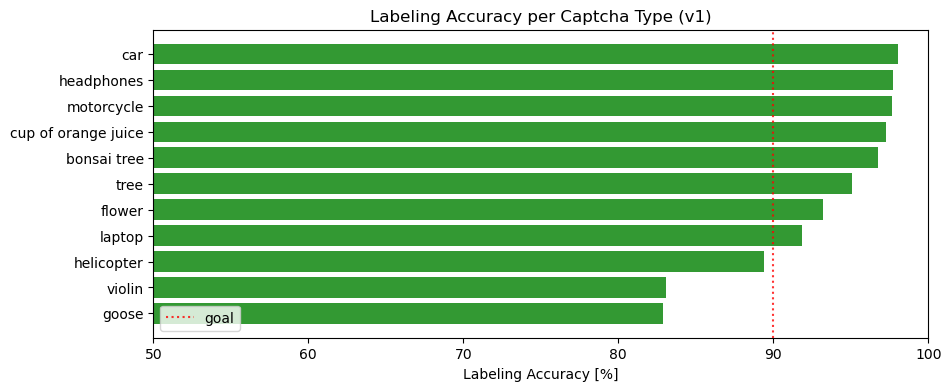

In [35]:
%run visualizer.py
plot_model_accuracy(model_info)

In [36]:
db1.load_models_into_src(threshold=0.9)

bonsai tree bonsai tree/23-229_01
File copied and renamed to: ../src/hcaptcha_solver/models//bonsai tree
laptop laptop/23-229_01
File copied and renamed to: ../src/hcaptcha_solver/models//laptop
tree tree/23-229_01
File copied and renamed to: ../src/hcaptcha_solver/models//tree
headphones headphones/23-229_01
File copied and renamed to: ../src/hcaptcha_solver/models//headphones
flower flower/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//flower
cup of orange juice cup of orange juice/23-228_03
File copied and renamed to: ../src/hcaptcha_solver/models//cup of orange juice
car car/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//car
motorcycle motorcycle/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//motorcycle


In [37]:
assert 1 == 0 # to avoid execution of code below

AssertionError: 

In [ ]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db1, urls[0], count=1000, collect_v2=True, limit=2000)

Loaded Website
Launched hCaptcha
Switched to Captcha
Captcha V1


KeyboardInterrupt: 

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db1)

Setting images for headphones
Setting images for bonsai tree
labeled bonsai tree/12-16-22-29-751605_0.png as True
labeled bonsai tree/12-16-22-33-296307_7.png as True
labeled bonsai tree/12-16-22-40-953300_0.png as False
labeled bonsai tree/12-16-22-51-327629_1.png as False
labeled bonsai tree/12-16-23-03-570926_1.png as False
labeled bonsai tree/12-16-23-10-848513_1.png as False
labeled bonsai tree/12-16-23-40-281236_7.png as False
labeled bonsai tree/12-16-24-07-040025_0.png as True
labeled bonsai tree/12-16-24-24-847494_6.png as True
Setting images for bonsai tree
labeled bonsai tree/12-16-22-40-086916_3.png as False
labeled bonsai tree/12-16-22-40-086916_7.png as False
labeled bonsai tree/12-16-23-12-541081_6.png as False
labeled bonsai tree/12-16-23-40-281236_8.png as True
labeled bonsai tree/12-16-23-44-917848_1.png as False
labeled bonsai tree/12-16-24-04-576511_7.png as False
labeled bonsai tree/12-16-24-07-040025_5.png as False
labeled bonsai tree/12-16-24-15-947022_5.png as F

C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-57-632259_7.png as True
labeled bonsai tree/12-16-22-46-235955_3.png as False
labeled bonsai tree/12-16-22-55-661477_3.png as False
labeled bonsai tree/12-16-22-58-241892_1.png as False
labeled bonsai tree/12-16-23-04-406374_8.png as False
labeled bonsai tree/12-16-23-35-917312_5.png as False
labeled bonsai tree/12-16-23-54-501771_2.png as False
labeled bonsai tree/12-16-23-54-501771_7.png as False
labeled bonsai tree/12-16-24-14-545031_6.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-53-298972_7.png as True
labeled bonsai tree/12-16-22-44-511678_0.png as True
labeled bonsai tree/12-16-22-52-187097_4.png as False
labeled bonsai tree/12-16-22-55-661477_4.png as False
labeled bonsai tree/12-16-23-15-981671_1.png as False
labeled bonsai tree/12-16-23-24-275523_0.png as True
labeled bonsai tree/12-16-23-24-275523_2.png as False
labeled bonsai tree/12-16-24-14-545031_4.png as False
labeled bonsai tree/12-16-24-17-737258_4.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-55-922178_8.png as False
labeled bonsai tree/12-16-22-50-581158_2.png as True
labeled bonsai tree/12-16-22-58-241892_2.png as True
labeled bonsai tree/12-16-23-14-224529_1.png as False
labeled bonsai tree/12-16-23-47-436103_3.png as False
labeled bonsai tree/12-16-23-55-292030_6.png as True
labeled bonsai tree/12-16-23-56-973894_5.png as True
labeled bonsai tree/12-16-24-17-737258_1.png as False
labeled bonsai tree/12-16-24-20-539043_2.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-34-134799_1.png as True
labeled bonsai tree/12-16-22-43-549178_0.png as False
labeled bonsai tree/12-16-22-47-028552_5.png as False
labeled bonsai tree/12-16-22-47-910485_4.png as False
labeled bonsai tree/12-16-22-55-661477_1.png as False
labeled bonsai tree/12-16-23-03-570926_3.png as False
labeled bonsai tree/12-16-23-12-541081_0.png as False
labeled bonsai tree/12-16-23-21-754558_3.png as True
labeled bonsai tree/12-16-23-32-584045_2.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-47-910485_3.png as False
labeled bonsai tree/12-16-22-50-581158_7.png as False
labeled bonsai tree/12-16-23-09-114606_0.png as False
labeled bonsai tree/12-16-23-15-105969_5.png as True
labeled bonsai tree/12-16-23-21-754558_2.png as False
labeled bonsai tree/12-16-23-35-113864_8.png as True
labeled bonsai tree/12-16-23-37-618962_7.png as False
labeled bonsai tree/12-16-23-59-653084_3.png as False
labeled bonsai tree/12-16-24-15-947022_8.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-57-632259_1.png as False
labeled bonsai tree/12-16-22-34-134799_4.png as False
labeled bonsai tree/12-16-23-15-105969_3.png as False
labeled bonsai tree/12-16-23-22-591652_0.png as False
labeled bonsai tree/12-16-23-45-728392_6.png as False
labeled bonsai tree/12-16-23-55-292030_3.png as False
labeled bonsai tree/12-16-24-02-813775_2.png as False
labeled bonsai tree/12-16-24-02-813775_4.png as False
labeled bonsai tree/12-16-24-24-847494_3.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-57-632259_6.png as False
labeled bonsai tree/12-16-22-34-134799_5.png as False
labeled bonsai tree/12-16-22-41-818559_1.png as False
labeled bonsai tree/12-16-22-52-187097_2.png as False
labeled bonsai tree/12-16-22-56-486920_2.png as True
labeled bonsai tree/12-16-23-00-899605_3.png as True
labeled bonsai tree/12-16-23-00-899605_8.png as False
labeled bonsai tree/12-16-23-47-436103_5.png as True
labeled bonsai tree/12-16-23-56-973894_0.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-23-00-025255_0.png as True
labeled bonsai tree/12-16-23-00-025255_7.png as False
labeled bonsai tree/12-16-23-11-697629_5.png as True
labeled bonsai tree/12-16-23-15-981671_5.png as True
labeled bonsai tree/12-16-23-19-963457_6.png as False
labeled bonsai tree/12-16-23-22-591652_3.png as False
labeled bonsai tree/12-16-23-26-943670_2.png as True
labeled bonsai tree/12-16-23-43-917770_7.png as False
labeled bonsai tree/12-16-23-44-917848_6.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-29-751605_2.png as True
labeled bonsai tree/12-16-22-30-729197_8.png as False
labeled bonsai tree/12-16-22-34-134799_2.png as True
labeled bonsai tree/12-16-22-41-818559_8.png as False
labeled bonsai tree/12-16-22-46-235955_1.png as True
labeled bonsai tree/12-16-22-47-910485_2.png as False
labeled bonsai tree/12-16-23-00-025255_5.png as False
labeled bonsai tree/12-16-23-40-281236_3.png as False
labeled bonsai tree/12-16-24-21-370678_4.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-40-953300_4.png as False
labeled bonsai tree/12-16-22-44-511678_4.png as False
labeled bonsai tree/12-16-22-47-910485_5.png as False
labeled bonsai tree/12-16-23-09-114606_6.png as True
labeled bonsai tree/12-16-23-19-963457_4.png as False
labeled bonsai tree/12-16-23-49-155765_7.png as False
labeled bonsai tree/12-16-24-02-813775_6.png as True
labeled bonsai tree/12-16-24-14-545031_7.png as False
labeled bonsai tree/12-16-24-24-847494_5.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-30-729197_0.png as False
labeled bonsai tree/12-16-22-37-428961_3.png as False
labeled bonsai tree/12-16-22-37-428961_6.png as False
labeled bonsai tree/12-16-22-51-327629_3.png as False
labeled bonsai tree/12-16-23-25-169172_3.png as True
labeled bonsai tree/12-16-23-35-113864_5.png as False
labeled bonsai tree/12-16-23-53-621166_2.png as False
labeled bonsai tree/12-16-24-16-927034_7.png as False
labeled bonsai tree/12-16-24-20-539043_5.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-54-182884_2.png as False
labeled bonsai tree/12-16-04-57-632259_8.png as False
labeled bonsai tree/12-16-22-45-346272_2.png as False
labeled bonsai tree/12-16-22-46-235955_4.png as False
labeled bonsai tree/12-16-23-09-114606_1.png as True
labeled bonsai tree/12-16-23-14-224529_2.png as False
labeled bonsai tree/12-16-23-48-252570_2.png as False
labeled bonsai tree/12-16-24-20-539043_1.png as False
labeled bonsai tree/12-16-24-23-052293_6.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-23-00-899605_7.png as False
labeled bonsai tree/12-16-23-04-406374_5.png as False
labeled bonsai tree/12-16-23-10-848513_0.png as False
labeled bonsai tree/12-16-23-25-169172_8.png as False
labeled bonsai tree/12-16-23-27-829418_5.png as False
labeled bonsai tree/12-16-23-44-917848_4.png as False
labeled bonsai tree/12-16-24-07-040025_4.png as False
labeled bonsai tree/12-16-24-19-668531_6.png as False
labeled bonsai tree/12-16-24-20-539043_3.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-29-751605_4.png as False
labeled bonsai tree/12-16-22-33-296307_0.png as False
labeled bonsai tree/12-16-22-39-264234_1.png as True
labeled bonsai tree/12-16-22-40-086916_8.png as False
labeled bonsai tree/12-16-22-52-187097_3.png as False
labeled bonsai tree/12-16-23-46-656697_6.png as False
labeled bonsai tree/12-16-24-05-387269_7.png as False
labeled bonsai tree/12-16-24-07-040025_7.png as False
labeled bonsai tree/12-16-24-17-737258_3.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-57-632259_0.png as False
labeled bonsai tree/12-16-04-57-632259_4.png as True
labeled bonsai tree/12-16-22-34-134799_0.png as False
labeled bonsai tree/12-16-22-37-428961_5.png as False
labeled bonsai tree/12-16-22-39-264234_2.png as False
labeled bonsai tree/12-16-22-46-235955_8.png as False
labeled bonsai tree/12-16-23-10-848513_6.png as False
labeled bonsai tree/12-16-23-11-697629_6.png as True
labeled bonsai tree/12-16-24-20-539043_0.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-29-751605_6.png as False
labeled bonsai tree/12-16-22-34-134799_3.png as False
labeled bonsai tree/12-16-22-44-511678_1.png as False
labeled bonsai tree/12-16-22-47-028552_1.png as True
labeled bonsai tree/12-16-23-44-917848_3.png as True
labeled bonsai tree/12-16-23-52-746745_1.png as False
labeled bonsai tree/12-16-24-05-387269_2.png as False
labeled bonsai tree/12-16-24-24-005989_6.png as False
labeled bonsai tree/12-16-24-24-847494_8.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-33-296307_6.png as False
labeled bonsai tree/12-16-22-43-549178_7.png as False
labeled bonsai tree/12-16-23-10-848513_5.png as False
labeled bonsai tree/12-16-23-25-169172_6.png as False
labeled bonsai tree/12-16-23-35-917312_4.png as False
labeled bonsai tree/12-16-23-49-155765_8.png as True
labeled bonsai tree/12-16-23-55-292030_1.png as False
labeled bonsai tree/12-16-24-04-576511_3.png as True
labeled bonsai tree/12-16-24-15-947022_2.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-40-953300_8.png as True
labeled bonsai tree/12-16-22-41-818559_2.png as False
labeled bonsai tree/12-16-22-51-327629_2.png as True
labeled bonsai tree/12-16-22-53-923083_7.png as True
labeled bonsai tree/12-16-23-04-406374_0.png as True
labeled bonsai tree/12-16-23-11-697629_3.png as False
labeled bonsai tree/12-16-23-32-584045_5.png as False
labeled bonsai tree/12-16-23-35-917312_8.png as False
labeled bonsai tree/12-16-23-43-917770_1.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-58-241892_4.png as True
labeled bonsai tree/12-16-22-58-241892_7.png as False
labeled bonsai tree/12-16-23-00-899605_1.png as True
labeled bonsai tree/12-16-23-15-105969_7.png as False
labeled bonsai tree/12-16-23-22-591652_1.png as False
labeled bonsai tree/12-16-23-40-281236_4.png as False
labeled bonsai tree/12-16-23-49-155765_2.png as False
labeled bonsai tree/12-16-23-56-973894_4.png as False
labeled bonsai tree/12-16-24-04-576511_2.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-37-428961_4.png as True
labeled bonsai tree/12-16-22-39-264234_4.png as True
labeled bonsai tree/12-16-22-53-028209_1.png as True
labeled bonsai tree/12-16-22-55-661477_6.png as False
labeled bonsai tree/12-16-23-15-105969_4.png as False
labeled bonsai tree/12-16-23-45-728392_5.png as True
labeled bonsai tree/12-16-23-47-436103_2.png as False
labeled bonsai tree/12-16-23-55-292030_2.png as False
labeled bonsai tree/12-16-24-16-927034_6.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db1)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))